In [1]:
from PoE_GPFlow import Generalised_PoE
m = Generalised_PoE()

2025-07-15 11:00:44.844606: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-15 11:00:44.847989: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-15 11:00:44.857784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752577244.871953   54125 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752577244.876491   54125 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752577244.888454   54125 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

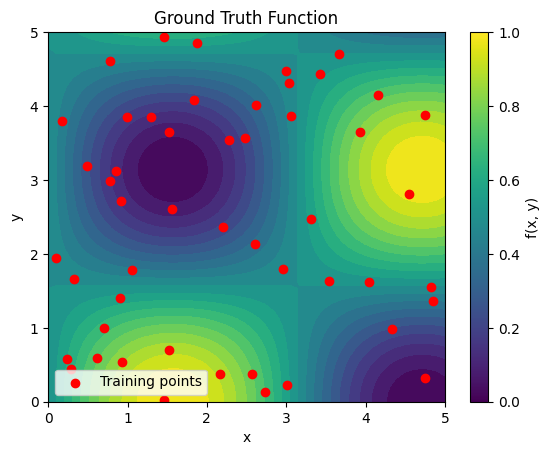

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function
def f(x, y):
    return np.sin(x) * np.cos(y)

# Generate training data
np.random.seed(42)
n_train = 50
x_train = np.random.uniform(0, 5, size=(n_train,))
y_train = np.random.uniform(0, 5, size=(n_train,))
X_train = np.vstack((x_train, y_train)).T
z_train = f(x_train, y_train) + 0.1 * np.random.randn(n_train)

# Generate test grid
x_lin = np.linspace(0, 5, 50)
y_lin = np.linspace(0, 5, 50)
X1, X2 = np.meshgrid(x_lin, y_lin)
X_test = np.vstack([X1.ravel(), X2.ravel()]).T

Z_true = f(X_test[:, 0], X_test[:, 1]).reshape(X1.shape)

plt.contourf(X1, X2, Z_true, levels=20, cmap="viridis")
plt.scatter(x_train, y_train, c='red', label='Training points')
plt.colorbar(label='f(x, y)')
plt.legend()
plt.title("Ground Truth Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
m.train(X=X_train, Y=np.vstack(z_train), no_experts=3, allow_seperate_hyperparms=False)

2025-07-15 11:00:52.240349: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Optimised hyperparameters: [1.48126387 1.78889642 0.00251111]


In [4]:
print(m.models[0].kernel.lengthscales)
print(m.models[1].kernel.lengthscales)
print(m.models[2].kernel.lengthscales)

[1.48126387 1.78889642]
[1.48126387 1.78889642]
[1.48126387 1.78889642]


In [5]:
print(m.models[0].likelihood.variance)
print(m.models[1].likelihood.variance)
print(m.models[2].likelihood.variance)

0.002511118667294231
0.002511118667294231
0.002511118667294231
